任务

1、采用Kmeans算法实现2D数据自动聚类，预测V1=80,V2=60数据类别

2、计算预测准确率，完成结果矫正

3、采用KNN、Meanshift算法，重复步骤1-2

数据: data.csv

In [4]:
#加载数据
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')
data.head(5)

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [8]:
#定义数据
X = data.drop(['labels'],axis=1)
# X
y = data.loc[:,'labels']
# y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [9]:
# pd.value_counts 分析y中有多少类
pd.value_counts(y)

2    1156
1     954
0     890
Name: labels, dtype: int64

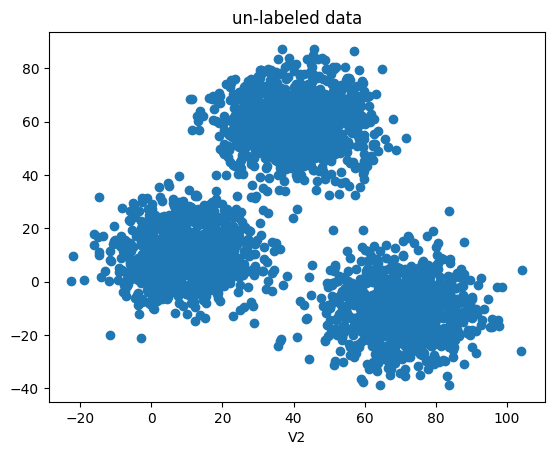

In [11]:
#数据进行可视化
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure()
plt.scatter(X.loc[:,'V1'],X.loc[:,'V2'])
plt.title("un-labeled data")
plt.xlabel('V1')
plt.xlabel('V2')
plt.show()

Text(0.5, 0, 'V2')

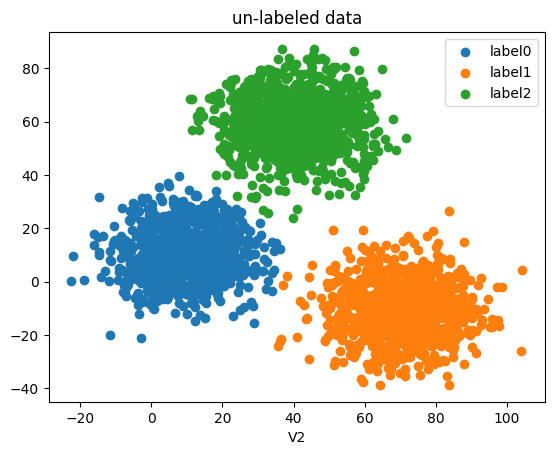

In [14]:
#查看原始数据集的图像
from matplotlib import pyplot as plt
fig1 = plt.figure()
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.title("un-labeled data")
plt.xlabel('V1')
plt.xlabel('V2')
# plt.show()

In [15]:
X.shape,y.shape

((3000, 2), (3000,))

In [16]:
#建立模型
from sklearn.cluster import KMeans
#分成三类，数据保持一致
KM = KMeans(n_clusters=3,random_state=0)
KM.fit(X)# fit之前一定要查看X,y的维度

D:\download\anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [18]:
#找出聚类的中心点
KM_center = KM.cluster_centers_
KM_center

array([[ 69.92418447, -10.11964119],
       [ 40.68362784,  59.71589274],
       [  9.4780459 ,  10.686052  ]])

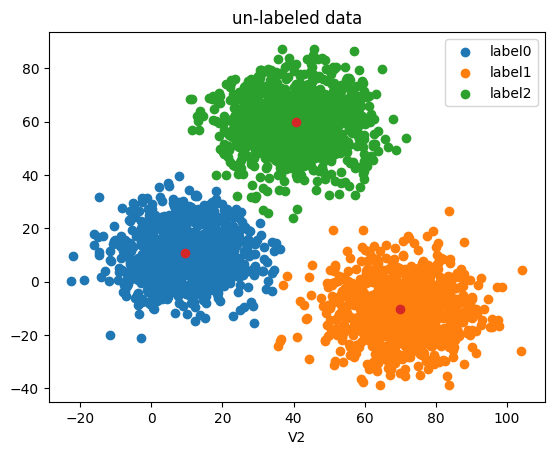

In [20]:
#画出三哥中心点
fig3 = plt.figure()

label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.title("un-labeled data")
plt.xlabel('V1')
plt.xlabel('V2')

plt.scatter(KM_center[:,0],KM_center[:,1])
plt.show()

In [21]:
#测试数据 V1=80，V2=60 从上图中应该看出是与绿色比较相近，应该是第二类
y_predict_test = KM.predict([[80,60]])
y_predict_test
#发现结果却被分到了第一类

D:\download\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

In [23]:
#计算预测估计值
y_predict = KM.predict(X)
y_predict

array([2, 2, 2, ..., 0, 0, 0])

In [25]:
#w我们继续使用
# pd.value_counts
pd.value_counts(y_predict),pd.value_counts(y)

(1    1149
 0     952
 2     899
 dtype: int64,
 2    1156
 1     954
 0     890
 Name: labels, dtype: int64)

In [26]:
#计算准确率
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
accuracy
#发现准确率很低

0.0023333333333333335

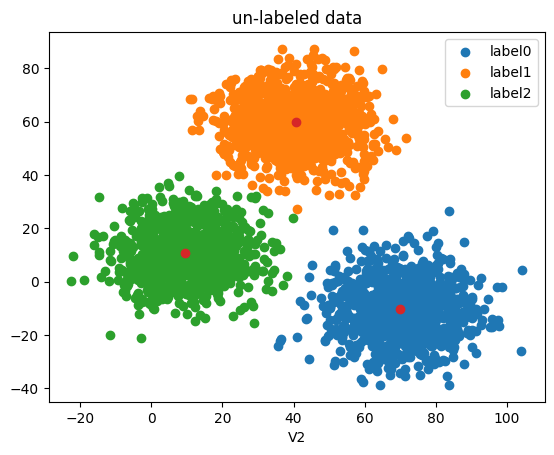

In [27]:
# 可视化图
fig3 = plt.figure()

label0 = plt.scatter(X.loc[:,'V1'][y_predict==0],X.loc[:,'V2'][y_predict==0])
label1 = plt.scatter(X.loc[:,'V1'][y_predict==1],X.loc[:,'V2'][y_predict==1])
label2 = plt.scatter(X.loc[:,'V1'][y_predict==2],X.loc[:,'V2'][y_predict==2])

plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.title("un-labeled data")
plt.xlabel('V1')
plt.xlabel('V2')

plt.scatter(KM_center[:,0],KM_center[:,1])
plt.show()

我们发现图像大致差不多，但是颜色却不一样

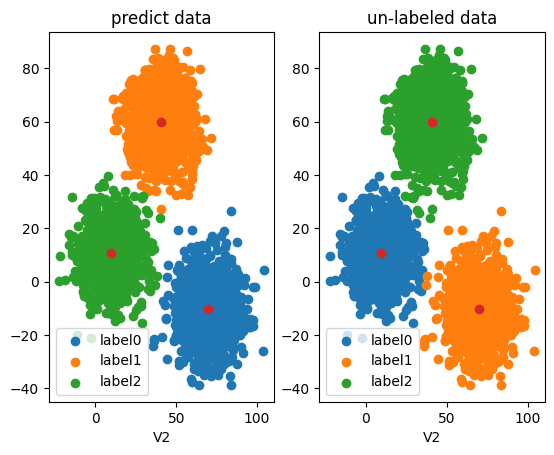

In [28]:
#做一个对比图片

fig4 = plt.subplot(1,2,1)
label0 = plt.scatter(X.loc[:,'V1'][y_predict==0],X.loc[:,'V2'][y_predict==0])
label1 = plt.scatter(X.loc[:,'V1'][y_predict==1],X.loc[:,'V2'][y_predict==1])
label2 = plt.scatter(X.loc[:,'V1'][y_predict==2],X.loc[:,'V2'][y_predict==2])
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.title("predict data")
plt.xlabel('V1')
plt.xlabel('V2')
plt.scatter(KM_center[:,0],KM_center[:,1])

fig4 = plt.subplot(1,2,2)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.title("un-labeled data")
plt.xlabel('V1')
plt.xlabel('V2')
plt.scatter(KM_center[:,0],KM_center[:,1])
plt.show()

原因在于无监督学习并没有具体的话分类固定的类，只是做出了划分

In [29]:
#进行数据的矫正
y_correct=[]
for i in y_predict:
    if i==0:
        y_correct.append(1)
    elif i==1:
        y_correct.append(2)
    else:
        y_correct.append(0)
print(pd.value_counts(y_correct),pd.value_counts(y))

2    1149
1     952
0     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [30]:
#在看准确率
print(accuracy_score(y,y_correct))

0.997
